In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#read the geojson file
gdf = gpd.read_file('data/finalized_collection.geojson')

In [12]:
gdf.head()

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance,region,geometry
0,Algeria,66810.0,20650.0,3552.0,3179.0,504384.0,311.0,8.255,13362052,4130058,710483,635878,100876814,0.800985,North Africa,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,Angola,56660.0,11969.0,2549.0,2610.0,339500.0,254.0,7.785,11331933,2393762,509710,522026,67899989,0.750270,Southern Africa,"MULTIPOLYGON (((11.46098 -16.55432, 11.46274 -..."
2,Benin,49951.0,9772.0,2144.0,2197.0,286585.0,233.0,7.100,9990230,1954377,428847,439375,57317023,0.667613,West Africa,"POLYGON ((0.77667 10.37667, 0.79220 10.36589, ..."
3,Botswana,48321.0,9811.0,1933.0,1940.0,265998.0,224.0,7.000,9664207,1962231,386617,388033,53199593,0.716335,Southern Africa,"POLYGON ((19.99865 -24.09709, 19.99913 -24.360..."
4,Burkina Faso,51250.0,10532.0,2041.0,2175.0,287943.0,233.0,7.060,10249935,2106493,408234,434998,57588647,0.729269,West Africa,"POLYGON ((-5.51321 10.43079, -5.51319 10.43066..."


In [10]:
gdf.describe()

,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,54.000000,54.000000,5.400000e+01,54.000000
mean,51757.462963,10961.092593,2201.444444,2210.388889,300158.518519,237.240741,7.234537,1.035150e+07,2.192207e+06,440293.148148,442070.296296,6.003170e+07,0.720655
std,5152.865866,3325.070209,461.688479,357.996385,66579.643751,25.106517,0.421244,1.030565e+06,6.650268e+05,92339.976527,71599.777182,1.331593e+07,0.041351
min,45647.000000,7937.000000,1714.000000,1734.000000,234963.000000,211.000000,6.540000,9.129471e+06,1.587305e+06,342831.000000,346803.000000,4.699253e+07,0.643100
25%,48325.000000,8901.500000,1923.250000,1967.250000,256354.750000,220.250000,6.910000,9.664984e+06,1.780341e+06,384653.750000,393388.500000,5.127094e+07,0.701047
50%,50042.000000,9793.500000,2034.500000,2135.500000,283070.500000,231.000000,7.167500,1.000836e+07,1.958749e+06,406870.500000,427180.500000,5.661408e+07,0.713510
75%,52673.250000,11834.500000,2310.250000,2365.750000,316492.250000,245.500000,7.425000,1.053461e+07,2.366880e+06,462002.750000,473187.500000,6.329846e+07,0.747611
max,68998.000000,22805.000000,4035.000000,3239.000000,539396.000000,323.000000,8.360000,1.379960e+07,4.561073e+06,806955.000000,647748.000000,1.078792e+08,0.825387


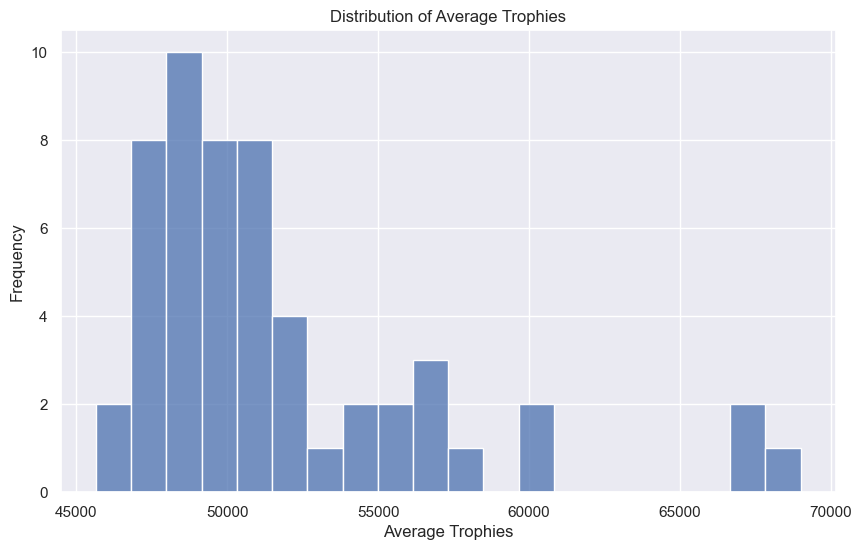

In [27]:
#Visualizing the distribution of average trophies
plt.figure(figsize=(10, 6))
sns.histplot(gdf['avg_trophies'], bins=20)
plt.title('Distribution of Average Trophies')
plt.xlabel('Average Trophies')
plt.ylabel('Frequency')
plt.show()

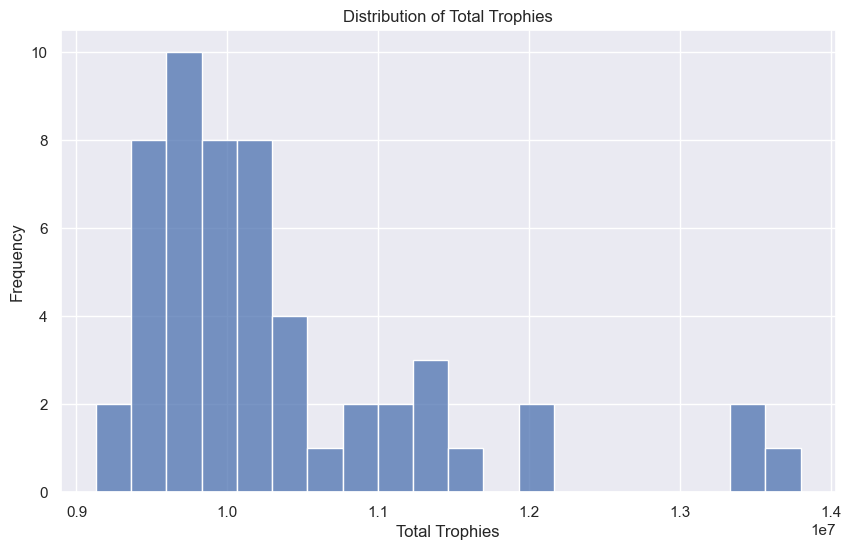

In [55]:
#distribution of total trophies
plt.figure(figsize=(10, 6))
sns.histplot(gdf['total_trophies'], bins=20)
plt.title('Distribution of Total Trophies')
plt.xlabel('Total Trophies')
plt.ylabel('Frequency')
plt.show()

<Axes: >

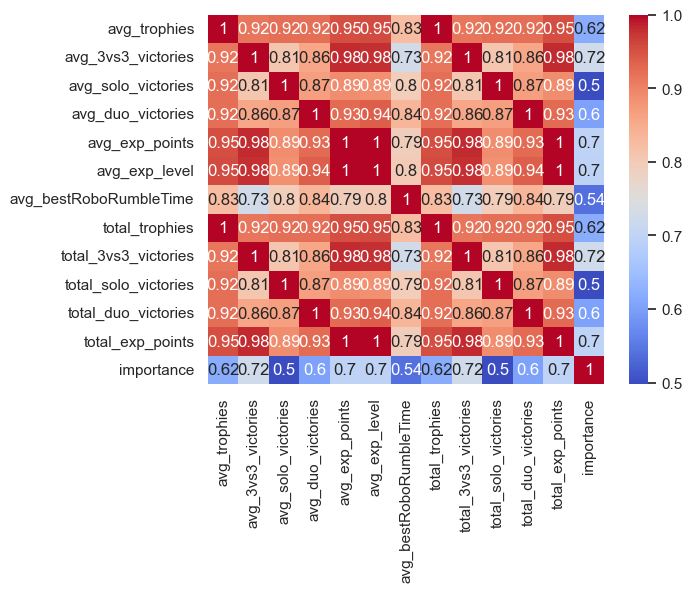

In [21]:
# Calculate correlation matrix
corr_matrix = gdf.drop(['country', 'region', 'geometry'], axis=1).corr()

# Plot correlation heatmap
sns.set_theme(context= 'notebook')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [24]:
gdf_grouped_mean = gdf.drop(["geometry","country"], axis=1).groupby('region').mean()
gdf_grouped_mean

,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance
region,,,,,,,,,,,,,
Central Africa,49698.375000,9776.375000,1995.875000,2075.375000,273905.750000,227.375000,7.137500,9.939687e+06,1.955264e+06,399162.375000,415049.875000,5.478115e+07,0.709921
East Africa,49745.615385,9702.538462,2092.230769,2049.461538,275388.307692,227.846154,7.079615,9.949134e+06,1.940508e+06,418446.615385,409877.384615,5.507765e+07,0.712994
North Africa,64121.600000,19437.600000,3254.200000,2898.000000,464942.800000,297.800000,7.878000,1.282432e+07,3.887559e+06,650881.000000,579593.800000,9.298855e+07,0.789392
Southern Africa,51695.000000,10634.333333,2140.666667,2254.666667,295936.750000,236.166667,7.267083,1.033901e+07,2.126845e+06,428134.416667,450939.166667,5.918737e+07,0.720904
West Africa,50604.687500,10172.187500,2109.562500,2160.562500,285081.937500,231.687500,7.183438,1.012095e+07,2.034409e+06,421919.187500,432109.500000,5.701638e+07,0.710580


In [30]:
gdf_grouped_sum = gdf.drop(["geometry","country","avg_exp_level","avg_bestRoboRumbleTime","importance"], axis=1).groupby('region').sum()
gdf_grouped_sum

,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points
region,,,,,,,,,,
Central Africa,397587.0,78211.0,15967.0,16603.0,2191246.0,79517498,15642109,3193299,3320399,438249163
East Africa,646693.0,126133.0,27199.0,26643.0,3580048.0,129338743,25226609,5439806,5328406,716009410
North Africa,320608.0,97188.0,16271.0,14490.0,2324714.0,64121619,19437796,3254405,2897969,464942773
Southern Africa,620340.0,127612.0,25688.0,27056.0,3551241.0,124068092,25522138,5137613,5411270,710248435
West Africa,809675.0,162755.0,33753.0,34569.0,4561311.0,161935174,32550537,6750707,6913752,912262128


In [35]:
import pycountry

# Function to get the country code
def get_country_code(country_name):
    special_cases = {
        'Cape Verde': 'CPV',  # Cabo Verde
        'Democratic Republic of the Congo': 'COD', 
        'Ivory Coast': 'CIV'  
    }
    if country_name in special_cases:
        return special_cases[country_name]
    try:
        country = pycountry.countries.lookup(country_name)
        return country.alpha_3
    except LookupError:
        return None


# Apply the function to the 'country' column
gdf['country_code'] = gdf['country'].apply(get_country_code)

# Display the first few rows to verify
print(gdf.head())

        country  avg_trophies  avg_3vs3_victories  avg_solo_victories  \
0       Algeria       66810.0             20650.0              3552.0   
1        Angola       56660.0             11969.0              2549.0   
2         Benin       49951.0              9772.0              2144.0   
3      Botswana       48321.0              9811.0              1933.0   
4  Burkina Faso       51250.0             10532.0              2041.0   

   avg_duo_victories  avg_exp_points  avg_exp_level  avg_bestRoboRumbleTime  \
0             3179.0        504384.0          311.0                   8.255   
1             2610.0        339500.0          254.0                   7.785   
2             2197.0        286585.0          233.0                   7.100   
3             1940.0        265998.0          224.0                   7.000   
4             2175.0        287943.0          233.0                   7.060   

   total_trophies  total_3vs3_victories  total_solo_victories  \
0        13362052    

In [36]:
gdf["country_code"].isna().sum()

0

In [37]:
#set the country code as the index
gdf.set_index('country_code', inplace=True)

In [40]:
gdf.columns

Index(['country', 'avg_trophies', 'avg_3vs3_victories', 'avg_solo_victories',
       'avg_duo_victories', 'avg_exp_points', 'avg_exp_level',
       'avg_bestRoboRumbleTime', 'total_trophies', 'total_3vs3_victories',
       'total_solo_victories', 'total_duo_victories', 'total_exp_points',
       'importance', 'region', 'geometry'],
      dtype='object')

In [ ]:
#export the data to a new geojson file as bs_africa.geojson
gdf.to_file("data/bs_africa.geojson", driver='GeoJSON')

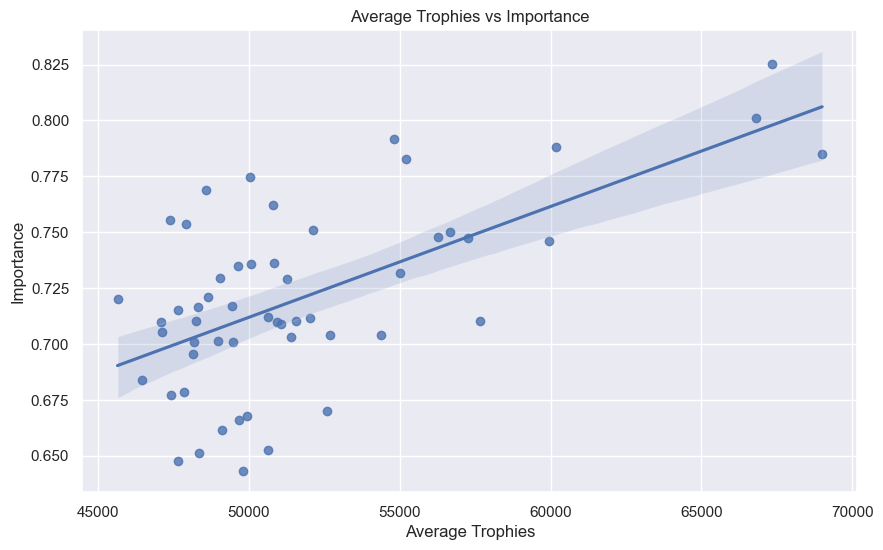

In [45]:
#regplot of average trophies vs importance
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trophies', y='importance', data=gdf)
plt.title('Average Trophies vs Importance')
plt.xlabel('Average Trophies')
plt.ylabel('Importance')
plt.show()

In [54]:
#correlation between average trophies and importance
gdf[['avg_duo_victories', 'importance']].corr()

,avg_duo_victories,importance
avg_duo_victories,1.000000,0.602709
importance,0.602709,1.000000
